In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode
from tabulate import tabulate
import gzip

In [2]:

df = pd.read_csv("D:/Semester 3/Data Mining/bottle.csv", low_memory=False)

In [3]:
display(df.head())

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
display(df.tail())

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,...,0.18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,...,0.18,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,108.46,...,0.18,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,...,0.31,10,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864862,34404,864863,093.4 026.4,20-1611SR-MX-310-2239-09340264-0015A-3,15,17.533,33.3880,5.774,24.15297,105.66,...,0.61,15,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
display(df.isnull())

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,False,False,False,False,False,False,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True
864859,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
864860,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
864861,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [7]:
df.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [8]:
dataset = df[['T_degC','Salnty','Btl_Cnt','Depthm','O2ml_L','O2Sat','Oxy_µmol/Kg','BtlNum']]
dataset

,T_degC,Salnty,Btl_Cnt,Depthm,O2ml_L,O2Sat,Oxy_µmol/Kg,BtlNum
0,10.500,33.4400,1,0,NaN,NaN,NaN,NaN
1,10.460,33.4400,2,8,NaN,NaN,NaN,NaN
2,10.460,33.4370,3,10,NaN,NaN,NaN,NaN
3,10.450,33.4200,4,19,NaN,NaN,NaN,NaN
4,10.450,33.4210,5,20,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
864858,18.744,33.4083,864859,0,5.805,108.74,253.47,NaN
864859,18.744,33.4083,864860,2,5.805,108.74,253.47,4.0
864860,18.692,33.4150,864861,5,5.796,108.46,253.06,3.0
864861,18.161,33.4062,864862,10,5.816,107.74,253.92,2.0


In [9]:
dataset.isnull().sum()

T_degC          10963
Salnty          47354
Btl_Cnt             0
Depthm              0
O2ml_L         168662
O2Sat          203589
Oxy_µmol/Kg    203595
BtlNum         746196
dtype: int64

In [10]:
final_data = dataset.dropna()
final_data.isnull().sum()

T_degC         0
Salnty         0
Btl_Cnt        0
Depthm         0
O2ml_L         0
O2Sat          0
Oxy_µmol/Kg    0
BtlNum         0
dtype: int64

In [11]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114934 entries, 683767 to 864862
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   T_degC       114934 non-null  float64
 1   Salnty       114934 non-null  float64
 2   Btl_Cnt      114934 non-null  int64  
 3   Depthm       114934 non-null  int64  
 4   O2ml_L       114934 non-null  float64
 5   O2Sat        114934 non-null  float64
 6   Oxy_µmol/Kg  114934 non-null  float64
 7   BtlNum       114934 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 7.9 MB


In [12]:
final_data.describe()

,T_degC,Salnty,Btl_Cnt,Depthm,O2ml_L,O2Sat,Oxy_µmol/Kg,BtlNum
count,114934.000000,114934.000000,114934.000000,114934.000000,114934.000000,114934.000000,114934.000000,114934.000000
mean,11.199064,33.681675,775061.792672,153.105765,3.773015,62.860198,164.383389,10.309604
std,3.541155,0.397412,52292.277086,156.941071,1.977152,35.485297,86.216517,6.069612
min,1.520000,31.101000,683768.000000,0.000000,-0.010000,-0.100000,-0.434900,0.000000
25%,8.430000,33.366000,729973.250000,40.000000,2.020000,30.700000,87.872110,5.000000
50%,10.610000,33.632000,775326.000000,99.000000,4.070000,64.600000,177.200900,10.000000
75%,13.962750,34.059000,820782.750000,229.000000,5.680000,100.400000,247.660600,15.000000
max,23.420000,34.681000,864863.000000,3542.000000,11.130000,214.100000,485.701800,24.000000


In [13]:
final_data.corr()

,T_degC,Salnty,Btl_Cnt,Depthm,O2ml_L,O2Sat,Oxy_µmol/Kg,BtlNum
T_degC,1.000000,-0.777925,-0.006202,-0.791259,0.879617,0.918408,0.880095,0.749703
Salnty,-0.777925,1.000000,-0.042002,0.767947,-0.914710,-0.903168,-0.914820,-0.698445
Btl_Cnt,-0.006202,-0.042002,1.000000,0.000363,-0.027357,-0.024459,-0.026818,-0.030577
Depthm,-0.791259,0.767947,0.000363,1.000000,-0.834627,-0.825489,-0.834532,-0.700889
O2ml_L,0.879617,-0.914710,-0.027357,-0.834627,1.000000,0.994984,0.999999,0.745065
O2Sat,0.918408,-0.903168,-0.024459,-0.825489,0.994984,1.000000,0.995094,0.755958
Oxy_µmol/Kg,0.880095,-0.914820,-0.026818,-0.834532,0.999999,0.995094,1.000000,0.745210
BtlNum,0.749703,-0.698445,-0.030577,-0.700889,0.745065,0.755958,0.745210,1.000000


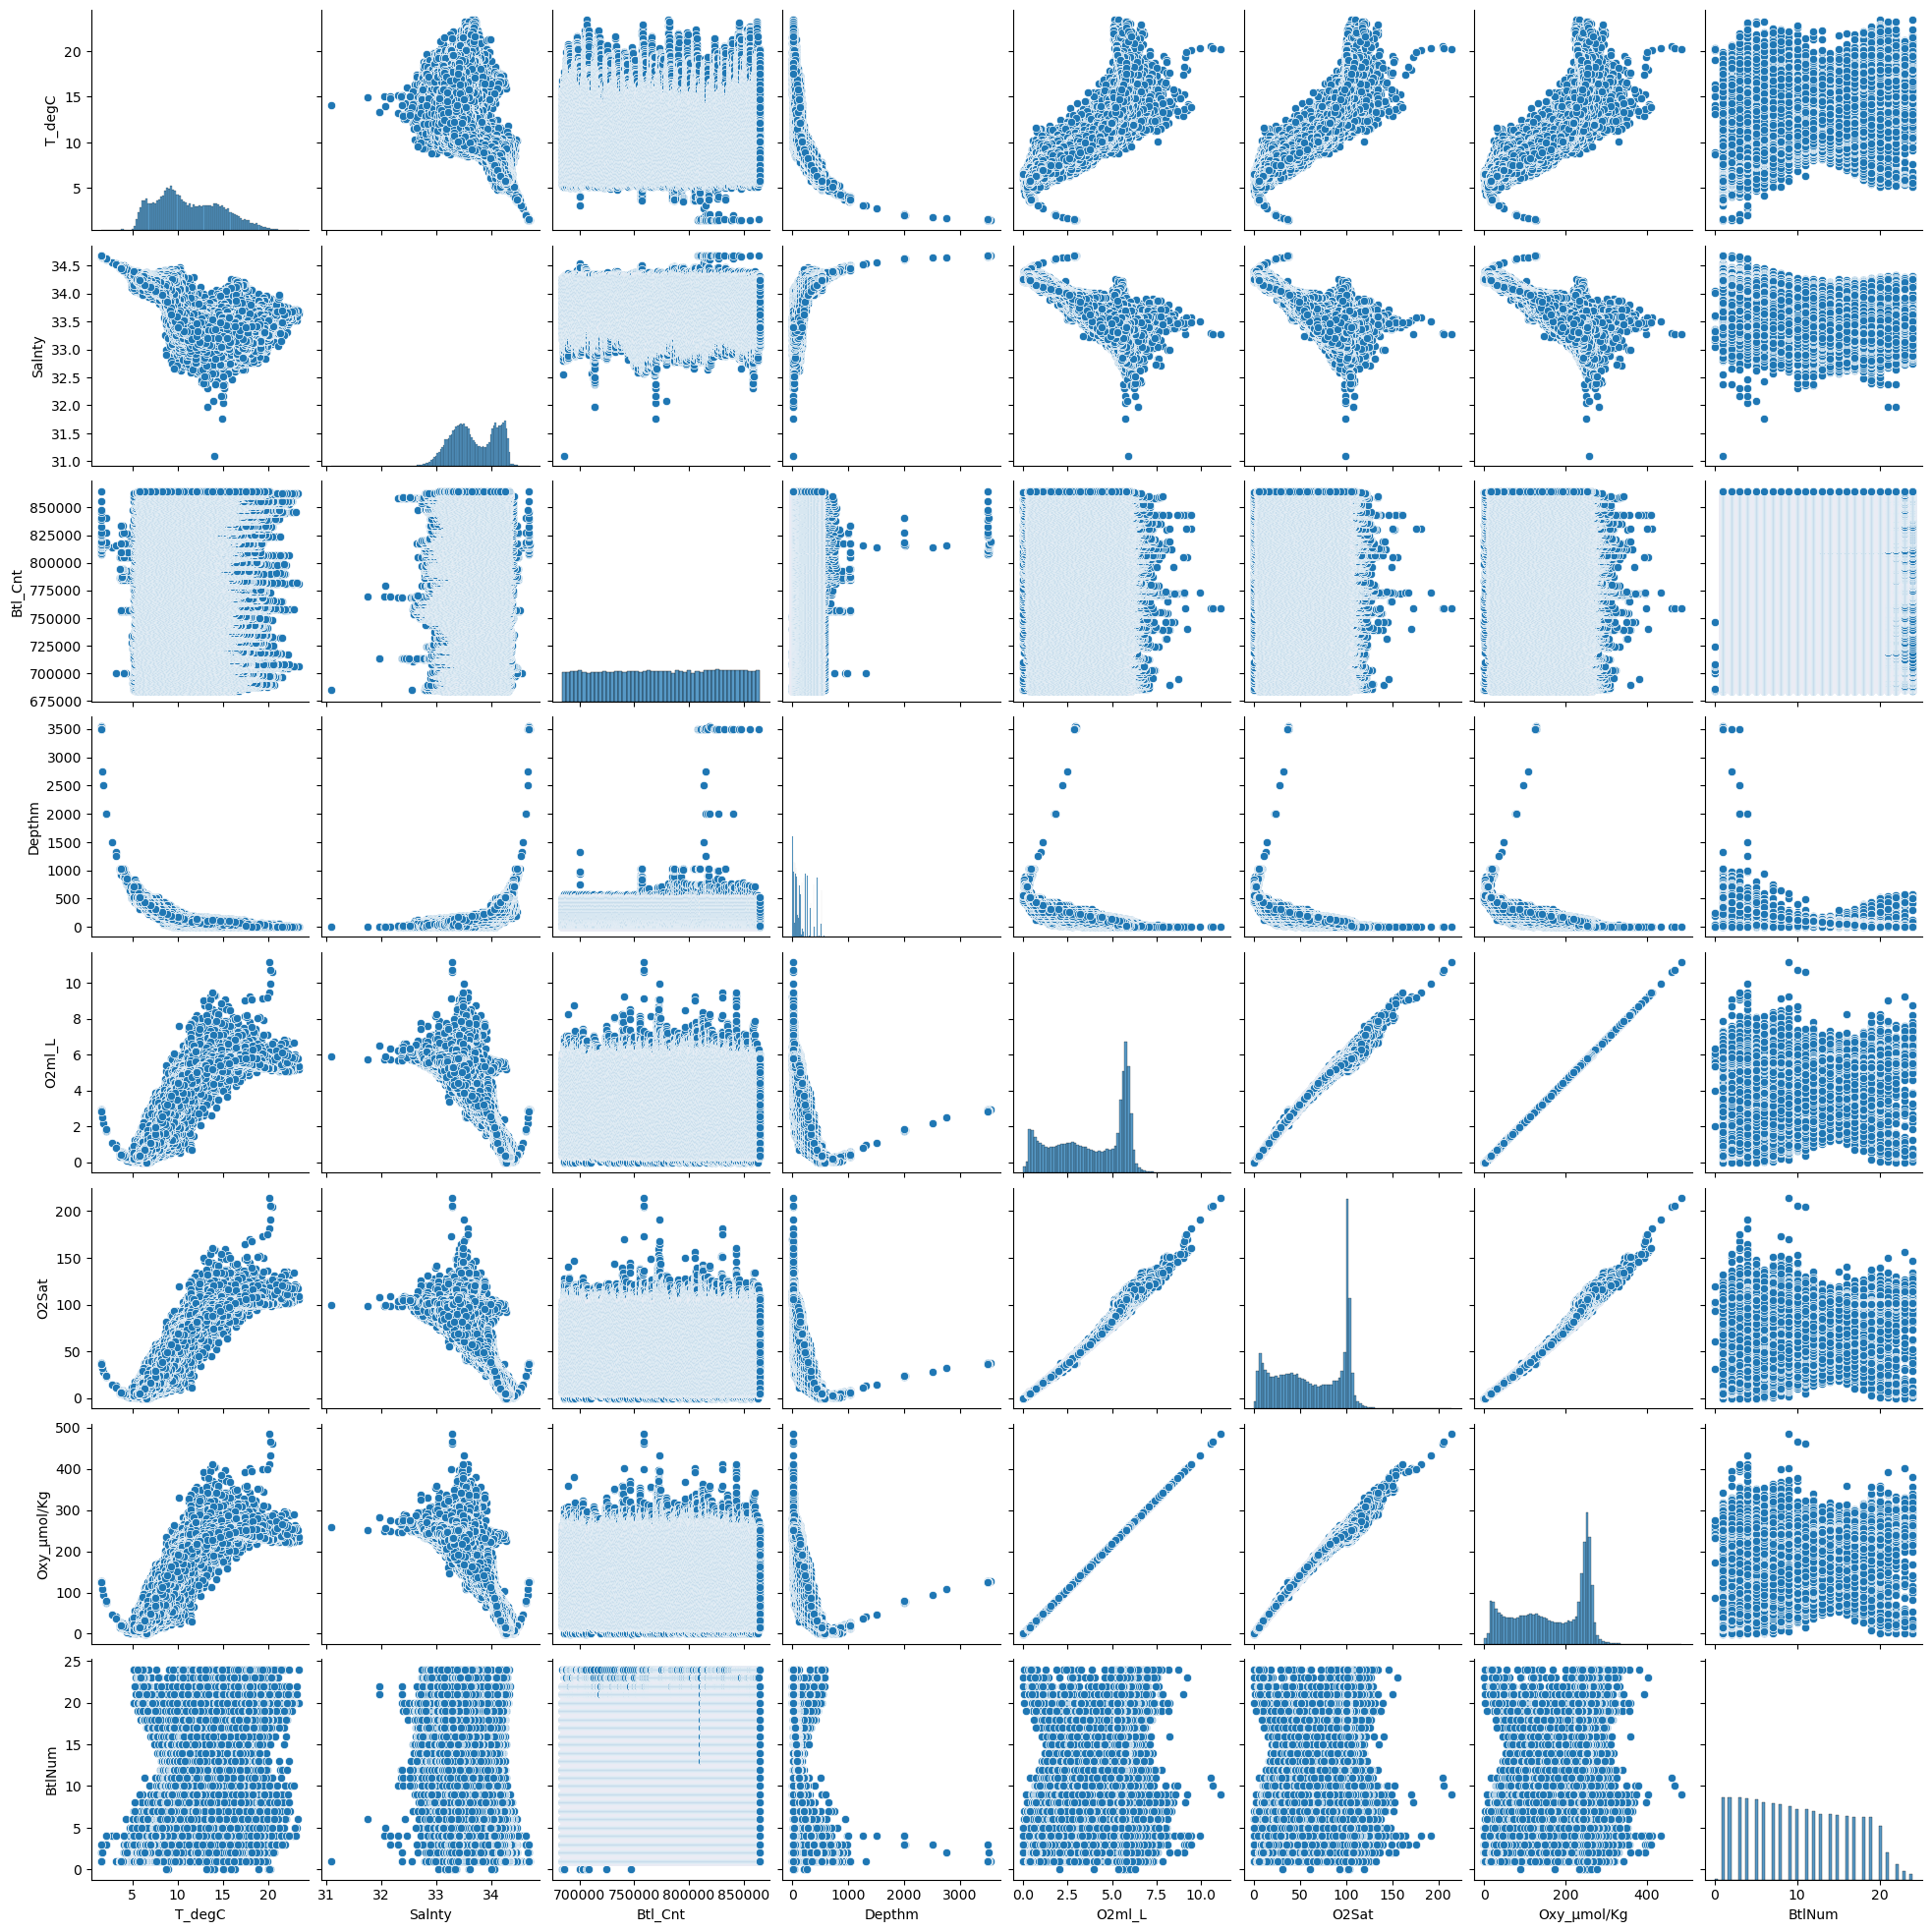

In [14]:
sns.pairplot(data = final_data)

In [35]:
numeric_df = final_data.select_dtypes(include=[np.number])

def calculate_statistics(final_data):
    stats = pd.DataFrame(index=final_data.columns, columns=['Mean', 'Median', 'Mode', 'Std Dev', 'Variance', 'Skewness', 'Kurtosis'])

    
    
numeric_cols = final_data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    print(f"\nStatistik untuk {col} : ")
    print(f"Mean               : {final_data[col].mean()}")
    print(f"Median             : {final_data[col].median()}")
    print(f"Mode               : {final_data[col].mode()[0]}")
    print(f"Standar Deviasi    : {final_data[col].std()}")
    print(f"Variansi           : {final_data[col].var()}")
    print(f"Skewness           : {final_data[col].skew()}")
    print(f"Kurtosis           : {final_data[col].kurt()}")


Statistik untuk T_degC : 
Mean               : 11.199063914942487
Median             : 10.61
Mode               : 9.1
Standar Deviasi    : 3.541155166685777
Variansi           : 12.539779914545372
Skewness           : 0.3921696522892289
Kurtosis           : -0.6847989150909499

Statistik untuk Salnty : 
Mean               : 33.681675245793244
Median             : 33.632
Mode               : 34.239
Standar Deviasi    : 0.39741240737424927
Variansi           : 0.15793662153499627
Skewness           : -0.06511885914653875
Kurtosis           : -1.0781981792027029

Statistik untuk Btl_Cnt : 
Mean               : 775061.7926723163
Median             : 775326.0
Mode               : 683768
Standar Deviasi    : 52292.277085929265
Variansi           : 2734482242.8316026
Skewness           : -0.019298579280895945
Kurtosis           : -1.2029520835537184

Statistik untuk Depthm : 
Mean               : 153.10576504776654
Median             : 99.0
Mode               : 2
Standar Deviasi    : 156.941

In [37]:
statistics = calculate_statistics(final_data)
print(statistics)

correlation_matrix = numeric_df.corr()
print("\nMatriks Korelasi:\n", correlation_matrix)

None

Matriks Korelasi:
                T_degC    Salnty   Btl_Cnt    Depthm    O2ml_L     O2Sat  \
T_degC       1.000000 -0.777925 -0.006202 -0.791259  0.879617  0.918408   
Salnty      -0.777925  1.000000 -0.042002  0.767947 -0.914710 -0.903168   
Btl_Cnt     -0.006202 -0.042002  1.000000  0.000363 -0.027357 -0.024459   
Depthm      -0.791259  0.767947  0.000363  1.000000 -0.834627 -0.825489   
O2ml_L       0.879617 -0.914710 -0.027357 -0.834627  1.000000  0.994984   
O2Sat        0.918408 -0.903168 -0.024459 -0.825489  0.994984  1.000000   
Oxy_µmol/Kg  0.880095 -0.914820 -0.026818 -0.834532  0.999999  0.995094   
BtlNum       0.749703 -0.698445 -0.030577 -0.700889  0.745065  0.755958   

             Oxy_µmol/Kg    BtlNum  
T_degC          0.880095  0.749703  
Salnty         -0.914820 -0.698445  
Btl_Cnt        -0.026818 -0.030577  
Depthm         -0.834532 -0.700889  
O2ml_L          0.999999  0.745065  
O2Sat           0.995094  0.755958  
Oxy_µmol/Kg     1.000000  0.745210  
Btl

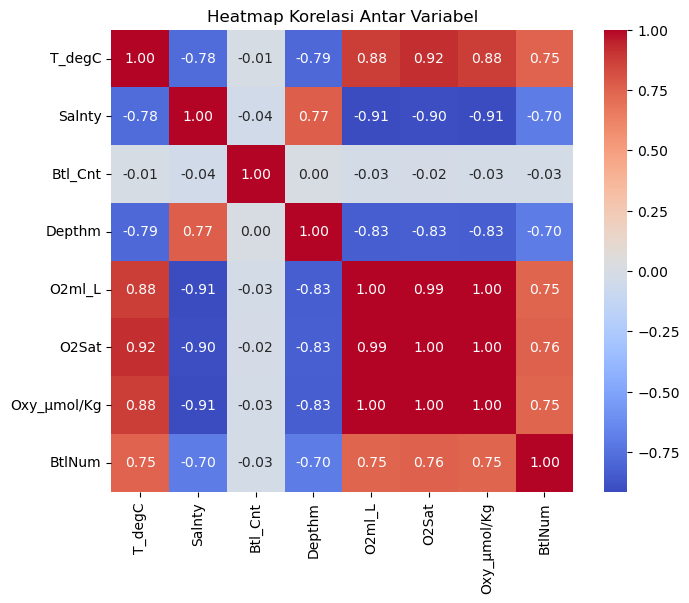


Nilai yang Hilang :
-  -----------  -
0  T_degC       0
1  Salnty       0
2  Btl_Cnt      0
3  Depthm       0
4  O2ml_L       0
5  O2Sat        0
6  Oxy_µmol/Kg  0
7  BtlNum       0
-  -----------  -


In [39]:
# Plot heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, square=True, fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

missing_values=final_data.isnull().sum().reset_index()
missing_values.columns=['column', 'Misiing Values']
print ('\nNilai yang Hilang :')
print (tabulate(missing_values) )

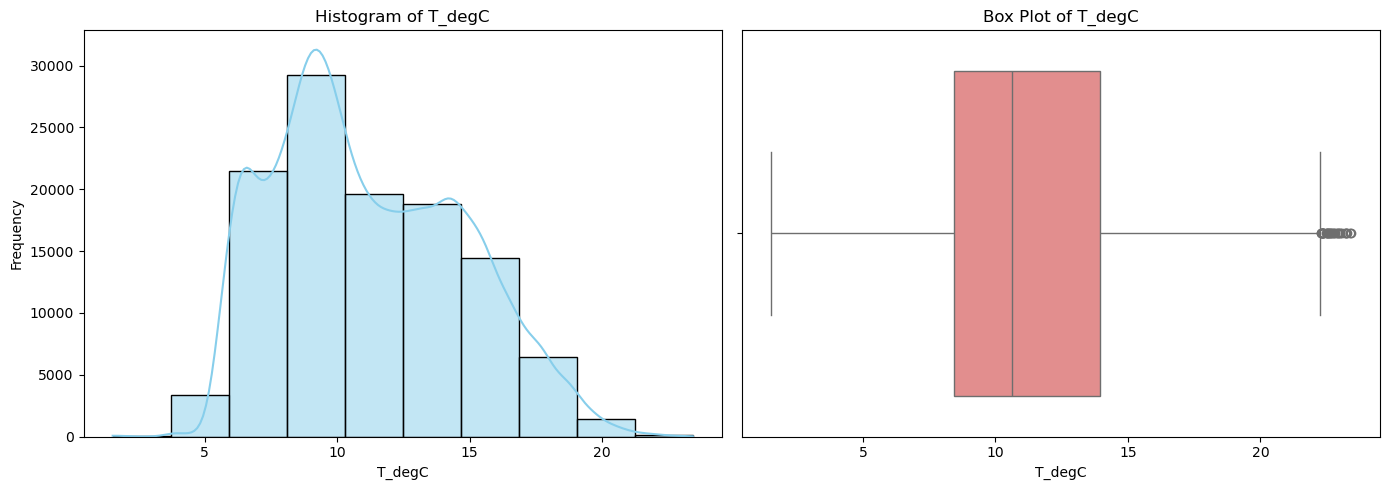

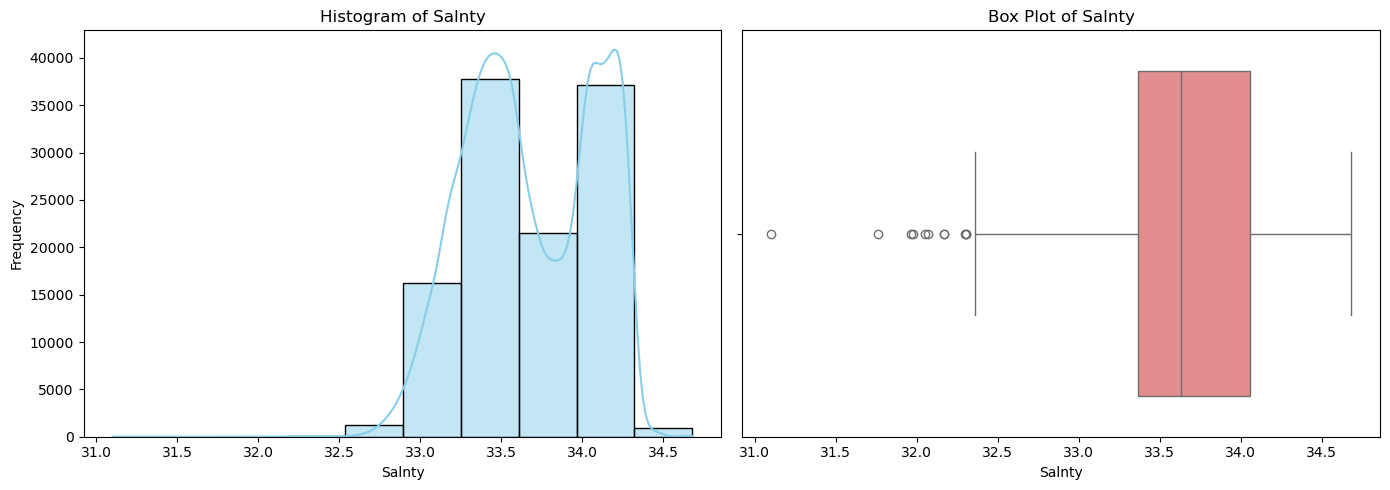

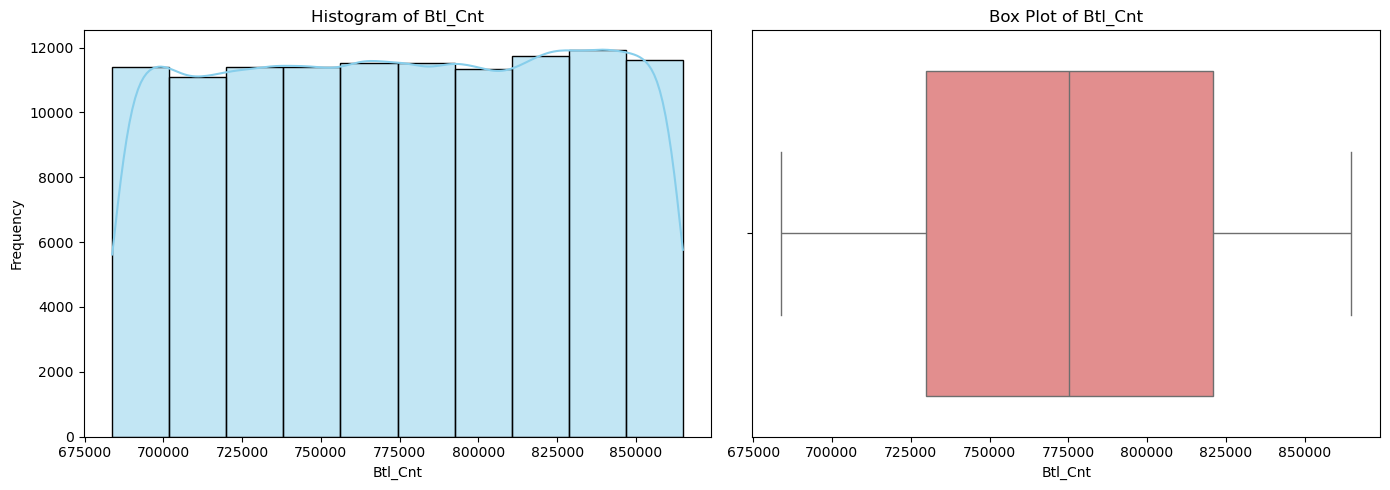

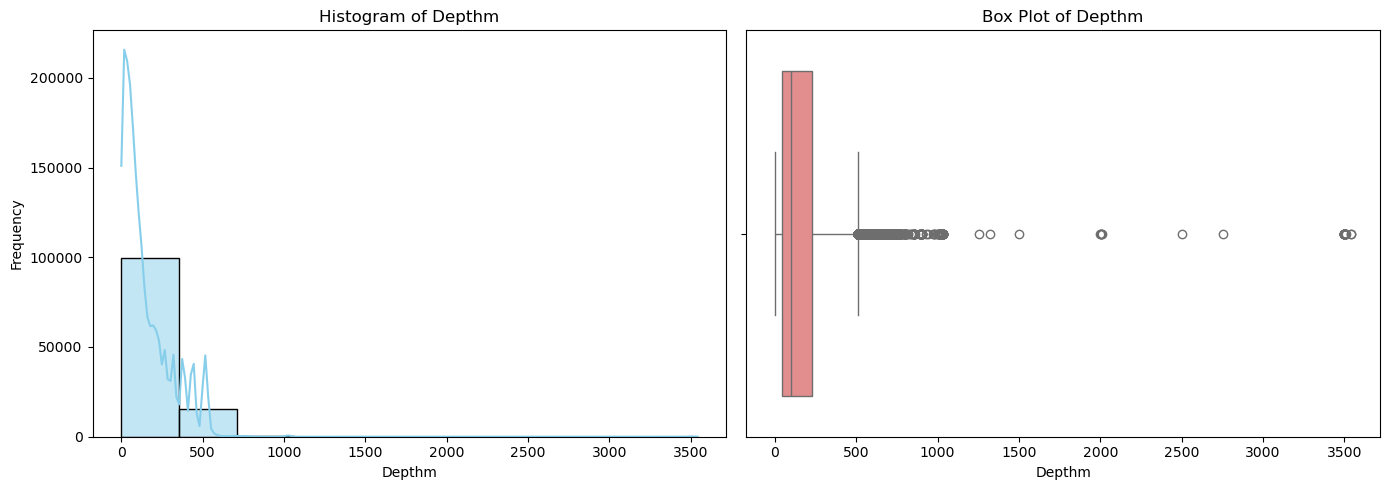

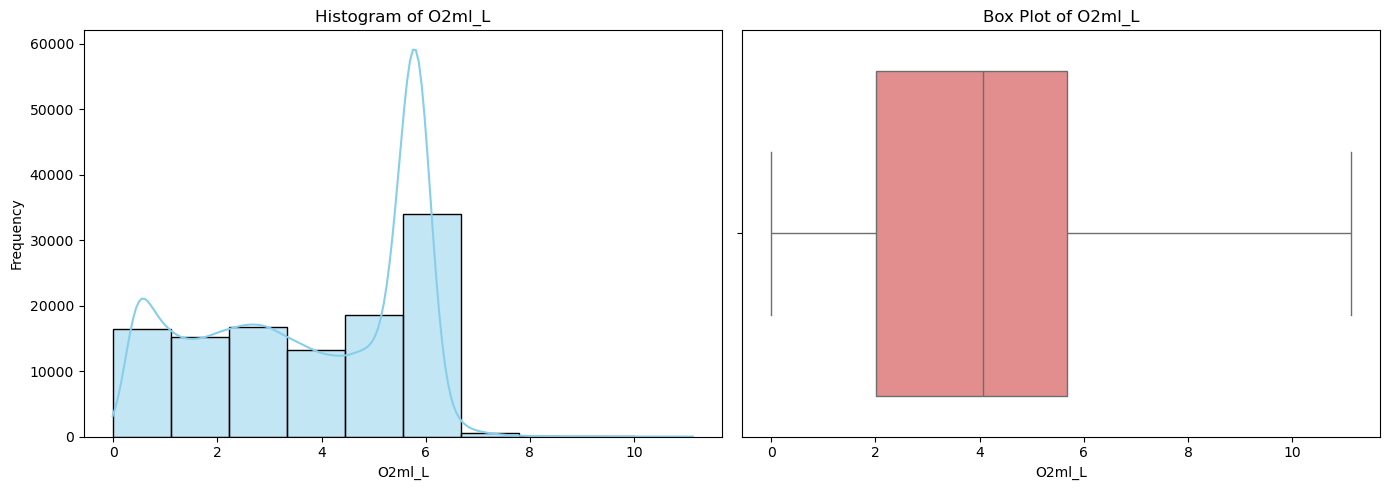

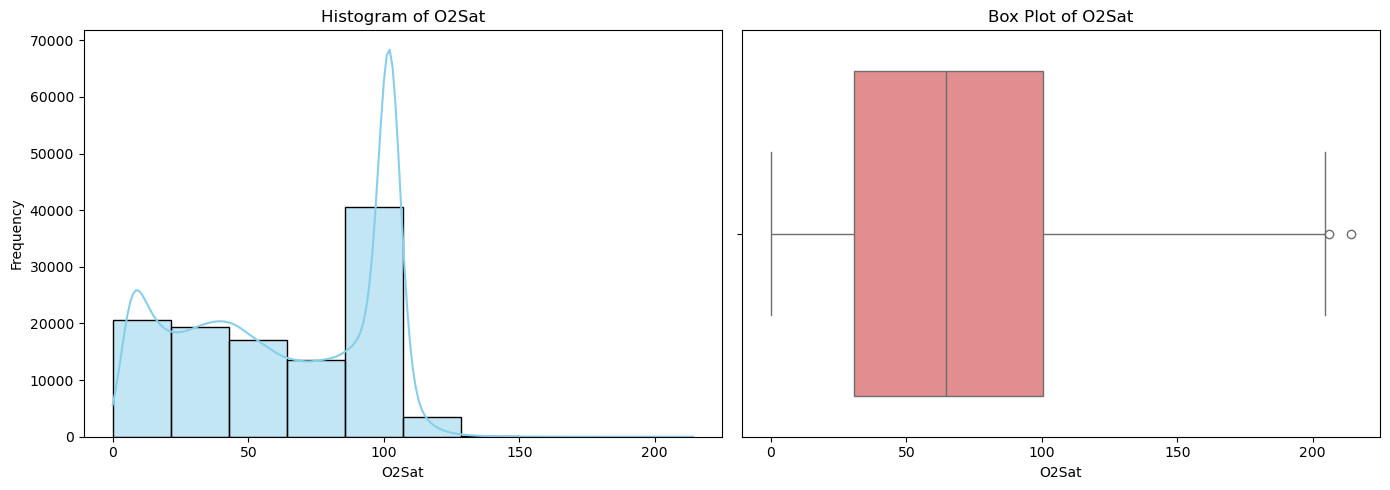

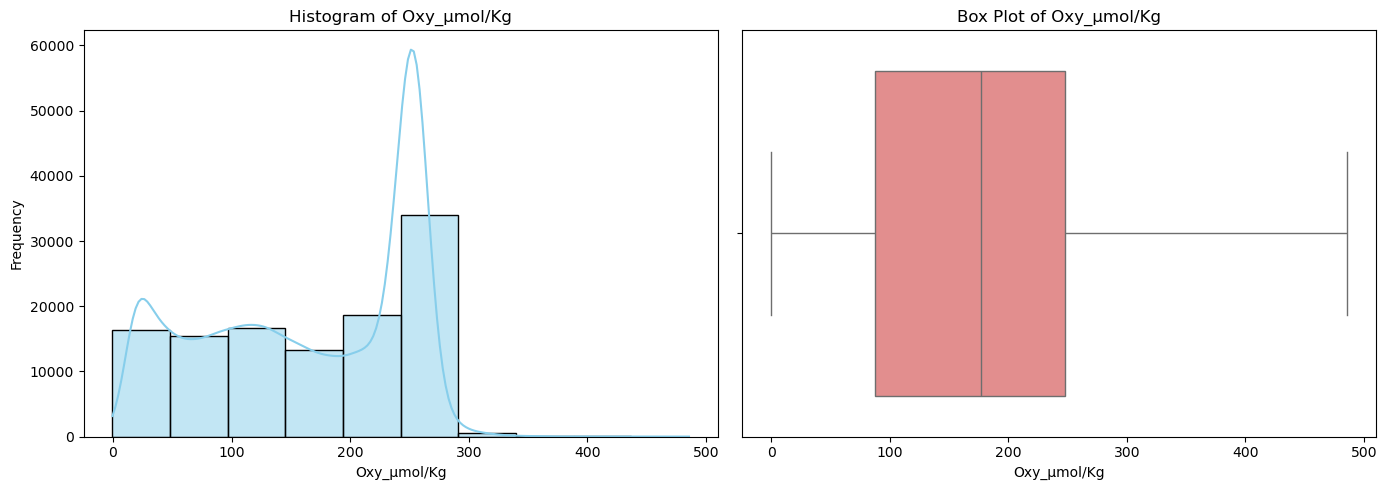

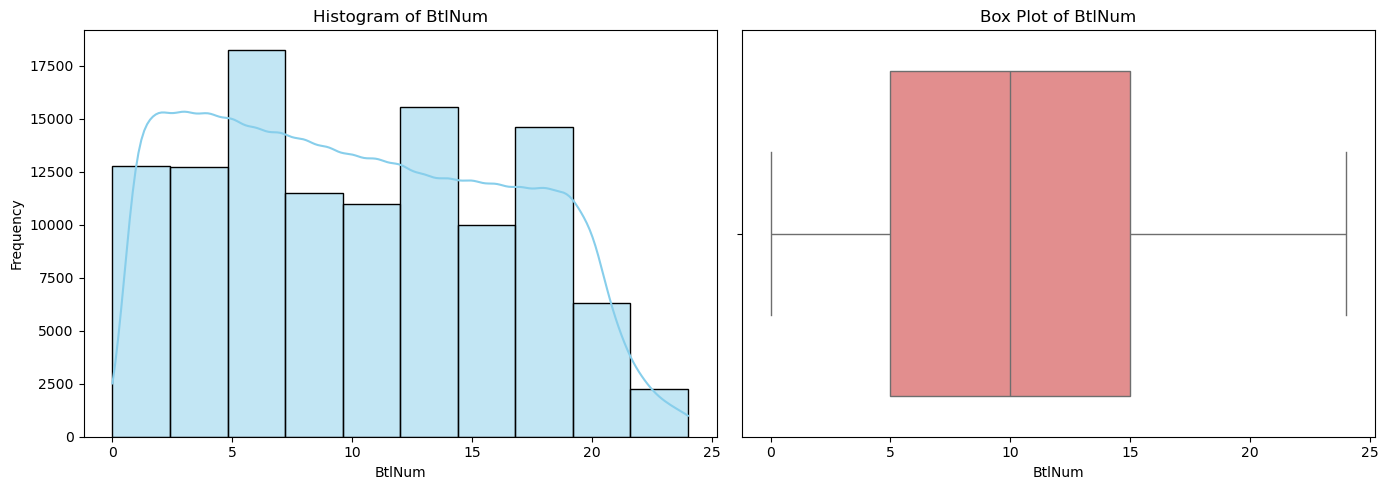

In [41]:
for col in numeric_df.columns:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(numeric_df[col], kde=True, bins=10, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=numeric_df[col], color='lightcoral')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()